# WORLD HAPPINESS

## Imports and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

import seaborn as sns; sns.set(color_codes=True)
import patsy
import statsmodels.api as sm
import scipy.stats as stats

#load Datasets
five = pd.read_csv('2015.csv')
six = pd.read_csv('2016.csv')
seven = pd.read_csv('2017.csv')
eight = pd.read_csv('2018.csv')
nine = pd.read_csv('2019.csv')

## Dataset cleaning

### 2015 Dataset

In [2]:
five.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


Country = Name of the country.

Region = Region the country belongs to.

Happiness Rank = Rank of the country based on the Happiness Score.

Happiness Score = A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

Standard Error = The standard error of the happiness score.

Economy (GDP per Capita) = The extent to which GDP contributes to the calculation of the Happiness Score.

Family = The extent to which Family contributes to the calculation of the Happiness Score

Health (Life Expectancy) = The extent to which Life expectancy contributed to the calculation of the Happiness Score

Freedom = The extent to which Freedom contributed to the calculation of the Happiness Score.

Trust (Government Corruption) = The extent to which Perception of Corruption contributes to Happiness Score.

Generosity = The extent to which Generosity contributed to the calculation of the Happiness Score.

Dystopia Residual = The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [3]:
five = five.rename(columns={"Country":"country",
                     "Region":"region",
                     "Happiness Rank":"hrank_15",
                     "Happiness Score":"hscore_15",
                     "Economy (GDP per Capita)":"gdppc_15",
                     "Family":"soc_15",
                     "Health (Life Expectancy)":"lexp_15",
                     "Freedom":"free_15",
                     "Trust (Government Corruption)":"gov_15",
                     "Generosity":"gen_15",
                    }
                  )
five = five[["country","region","hrank_15","hscore_15","gdppc_15","soc_15","lexp_15","free_15","gov_15","gen_15"]]
five.head(1)

,country,region,hrank_15,hscore_15,gdppc_15,soc_15,lexp_15,free_15,gov_15,gen_15
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678


### 2016 Dataset

In [4]:
six.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [5]:
six = six.rename(columns={"Country":"country",
                     "Happiness Rank":"hrank_16",
                     "Happiness Score":"hscore_16",
                     "Standard Error":"serror_16",
                     "Economy (GDP per Capita)":"gdppc_16",
                     "Family":"soc_16",
                     "Health (Life Expectancy)":"lexp_16",
                     "Freedom":"free_16",
                     "Trust (Government Corruption)":"gov_16",
                     "Generosity":"gen_16",
                    }
           )
six = six[["country","hrank_16","hscore_16","gdppc_16","soc_16","lexp_16","free_16","gov_16","gen_16"]]
six.head(1)

,country,hrank_16,hscore_16,gdppc_16,soc_16,lexp_16,free_16,gov_16,gen_16
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171


### 2017 Dataset

In [6]:
seven.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [7]:
cols = ['Country','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.','Freedom',
        'Trust..Government.Corruption.','Generosity']
seven = seven[cols]
seven = seven.rename(columns={"Country":"country",
                     "Happiness.Rank":"hrank_17",
                     "Happiness.Score":"hscore_17",
                     "Economy..GDP.per.Capita.":"gdppc_17",
                     "Family":"soc_17",
                     "Health..Life.Expectancy.":"lexp_17",
                     "Freedom":"free_17",
                     "Trust..Government.Corruption.":"gov_17",
                     "Generosity":"gen_17",
                    }
           )
seven.head(1)

,country,hrank_17,hscore_17,gdppc_17,soc_17,lexp_17,free_17,gov_17,gen_17
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012


### 2018 Dataset

In [8]:
eight.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [9]:
cols = ['Country or region','Overall rank','Score','GDP per capita','Social support','Healthy life expectancy',
 'Freedom to make life choices','Perceptions of corruption','Generosity']
eight = eight[cols]

eight = eight.rename(columns={"Country or region":"country",
                     "Overall rank":"hrank_18",
                     "Score":"hscore_18",
                     "GDP per capita":"gdppc_18",
                     "Social support":"soc_18",
                     "Healthy life expectancy":"lexp_18",
                     "Freedom to make life choices":"free_18",
                     "Perceptions of corruption":"gov_18",
                     "Generosity":"gen_18",
                    }
           )
eight.head(1)

,country,hrank_18,hscore_18,gdppc_18,soc_18,lexp_18,free_18,gov_18,gen_18
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202


### 2019 Dataset

In [10]:
nine.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [11]:
cols = ['Country or region','Overall rank','Score','GDP per capita','Social support','Healthy life expectancy',
 'Freedom to make life choices','Perceptions of corruption','Generosity']
nine = nine[cols]

nine = nine.rename(columns={"Country or region":"country",
                     "Overall rank":"hrank_19",
                     "Score":"hscore_19",
                     "GDP per capita":"gdppc_19",
                     "Social support":"soc_19",
                     "Healthy life expectancy":"lexp_19",
                     "Freedom to make life choices":"free_19",
                     "Perceptions of corruption":"gov_19",
                     "Generosity":"gen_19",
                    }
                  )
nine.head(1)

,country,hrank_19,hscore_19,gdppc_19,soc_19,lexp_19,free_19,gov_19,gen_19
0,Finland,1,7.769,1.34,1.587,0.986,0.596,0.393,0.153


### Join all

In [12]:
print(five.shape,six.shape,seven.shape,eight.shape,nine.shape)

(158, 10) (157, 9) (155, 9) (156, 9) (156, 9)


In [13]:
df = five.join(six.set_index('country'), on='country'
              ).join(seven.set_index('country'), on='country'
                    ).join(eight.set_index('country'), on='country'
                          ).join(nine.set_index('country'), on='country')
df = df.dropna()
df[["hrank_16","hrank_17","hrank_18","hrank_19"]] = df[["hrank_16","hrank_17","hrank_18","hrank_19"]].astype(int)

In [14]:
df.head(1)

,country,region,hrank_15,hscore_15,gdppc_15,soc_15,lexp_15,free_15,gov_15,gen_15,...,gov_18,gen_18,hrank_19,hscore_19,gdppc_19,soc_19,lexp_19,free_19,gov_19,gen_19
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,0.357,0.256,6,7.48,1.452,1.526,1.052,0.572,0.343,0.263


## Ranks data

In [15]:
ranks = df[["country","region","hrank_15","hrank_16","hrank_17","hrank_18","hrank_19"]]
ranks.head(5)

,country,region,hrank_15,hrank_16,hrank_17,hrank_18,hrank_19
0,Switzerland,Western Europe,1,2,4,5,6
1,Iceland,Western Europe,2,3,3,4,4
2,Denmark,Western Europe,3,1,2,3,2
3,Norway,Western Europe,4,4,1,2,3
4,Canada,North America,5,6,7,7,9


In [16]:
ranks.tail(5)

,country,region,hrank_15,hrank_16,hrank_17,hrank_18,hrank_19
153,Rwanda,Sub-Saharan Africa,154,152,151,151,152
154,Benin,Sub-Saharan Africa,155,153,143,136,102
155,Syria,Middle East and Northern Africa,156,156,152,150,149
156,Burundi,Sub-Saharan Africa,157,157,154,156,145
157,Togo,Sub-Saharan Africa,158,155,150,139,139


In [17]:
ranks["hrank_ave"] = ranks[["hrank_15","hrank_16","hrank_17","hrank_18","hrank_19"]].mean(axis=1)
ranks = ranks.sort_values(by="hrank_ave")
ranks.head()

C:\Users\derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,region,hrank_15,hrank_16,hrank_17,hrank_18,hrank_19,hrank_ave
2,Denmark,Western Europe,3,1,2,3,2,2.2
3,Norway,Western Europe,4,4,1,2,3,2.8
1,Iceland,Western Europe,2,3,3,4,4,3.2
0,Switzerland,Western Europe,1,2,4,5,6,3.6
5,Finland,Western Europe,6,5,5,1,1,3.6


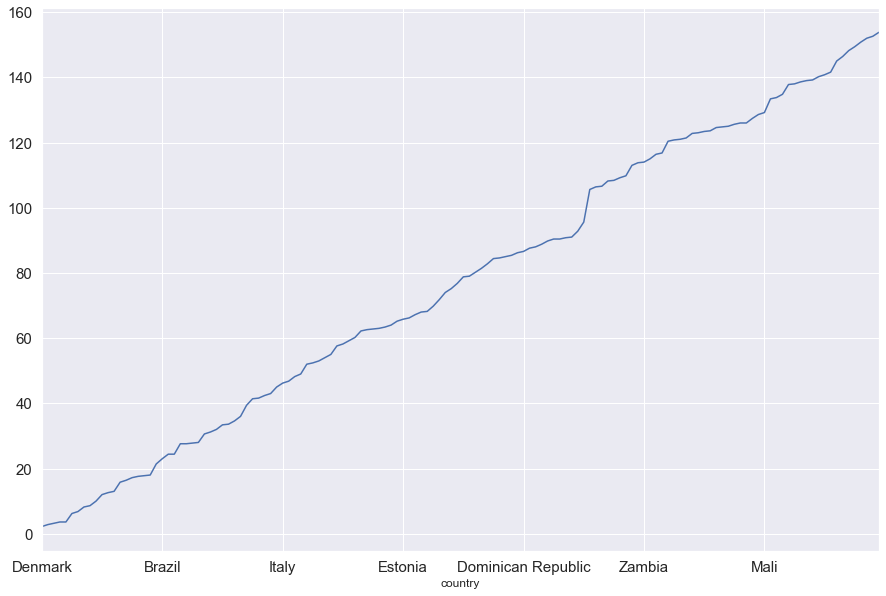

In [18]:
ranks.set_index("country")["hrank_ave"].plot.line(figsize=(15,10),fontsize=15)

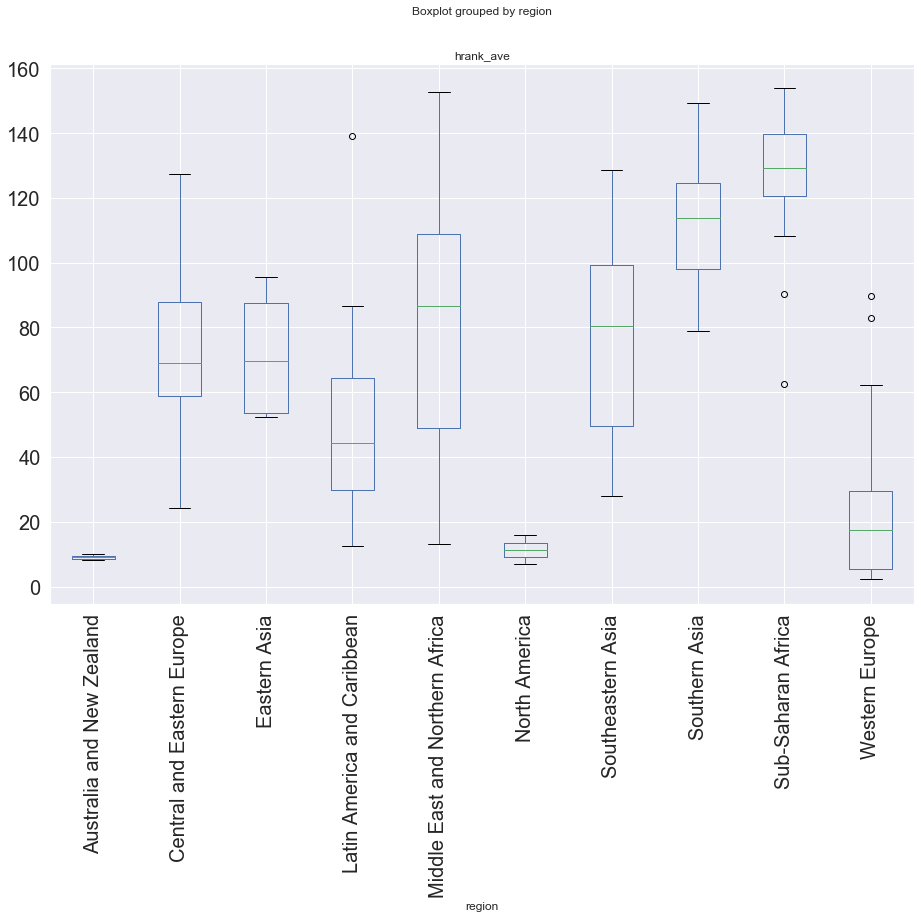

In [19]:
ranks.boxplot(column='hrank_ave',by='region',rot=90,figsize=(15,10),fontsize=20)

In [20]:
region_ranks = ranks.groupby('region')['hrank_ave'].agg(['count','mean']).reset_index().sort_values(by="mean")
region_ranks

,region,count,mean
0,Australia and New Zealand,2,9.100000
5,North America,2,11.300000
9,Western Europe,20,25.010000
3,Latin America and Caribbean,20,50.550000
2,Eastern Asia,4,71.750000
1,Central and Eastern Europe,28,75.157143
6,Southeastern Asia,8,78.200000
4,Middle East and Northern Africa,18,83.400000
7,Southern Asia,7,112.457143
8,Sub-Saharan Africa,31,127.625806


In [21]:
ranks[ranks["region"]=="Australia and New Zealand"]

,country,region,hrank_15,hrank_16,hrank_17,hrank_18,hrank_19,hrank_ave
8,New Zealand,Australia and New Zealand,9,8,8,8,8,8.2
9,Australia,Australia and New Zealand,10,9,10,10,11,10.0


In [22]:
ranks[ranks["region"]=="North America"]

,country,region,hrank_15,hrank_16,hrank_17,hrank_18,hrank_19,hrank_ave
4,Canada,North America,5,6,7,7,9,6.8
14,United States,North America,15,13,14,18,19,15.8


In [23]:
ranks[ranks["region"]=="Western Europe"]

,country,region,hrank_15,hrank_16,hrank_17,hrank_18,hrank_19,hrank_ave
2,Denmark,Western Europe,3,1,2,3,2,2.2
3,Norway,Western Europe,4,4,1,2,3,2.8
1,Iceland,Western Europe,2,3,3,4,4,3.2
0,Switzerland,Western Europe,1,2,4,5,6,3.6
5,Finland,Western Europe,6,5,5,1,1,3.6
6,Netherlands,Western Europe,7,7,6,6,5,6.2
7,Sweden,Western Europe,8,10,9,9,7,8.6
12,Austria,Western Europe,13,12,13,12,10,12.0
17,Ireland,Western Europe,18,19,15,14,16,16.4
16,Luxembourg,Western Europe,17,20,18,17,14,17.2


## Score Data

In [24]:
scores = df[["country","region","hscore_15","hscore_16","hscore_17","hscore_18","hscore_19"]]
scores.head()

,country,region,hscore_15,hscore_16,hscore_17,hscore_18,hscore_19
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554
4,Canada,North America,7.427,7.404,7.316,7.328,7.278


In [25]:
scores.tail()

,country,region,hscore_15,hscore_16,hscore_17,hscore_18,hscore_19
153,Rwanda,Sub-Saharan Africa,3.465,3.515,3.471,3.408,3.334
154,Benin,Sub-Saharan Africa,3.340,3.484,3.657,4.141,4.883
155,Syria,Middle East and Northern Africa,3.006,3.069,3.462,3.462,3.462
156,Burundi,Sub-Saharan Africa,2.905,2.905,2.905,2.905,3.775
157,Togo,Sub-Saharan Africa,2.839,3.303,3.495,3.999,4.085


In [26]:
scores["hscore_ave"] = scores[["country","region","hscore_15","hscore_16","hscore_17","hscore_18","hscore_19"]].mean(axis=1)
scores = scores.sort_values(by="hscore_ave")
scores.head()

C:\Users\derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,region,hscore_15,hscore_16,hscore_17,hscore_18,hscore_19,hscore_ave
156,Burundi,Sub-Saharan Africa,2.905,2.905,2.905,2.905,3.775,3.0790
155,Syria,Middle East and Northern Africa,3.006,3.069,3.462,3.462,3.462,3.2922
153,Rwanda,Sub-Saharan Africa,3.465,3.515,3.471,3.408,3.334,3.4386
145,Tanzania,Sub-Saharan Africa,3.781,3.666,3.349,3.303,3.231,3.4660
152,Afghanistan,Southern Asia,3.575,3.360,3.794,3.632,3.203,3.5128


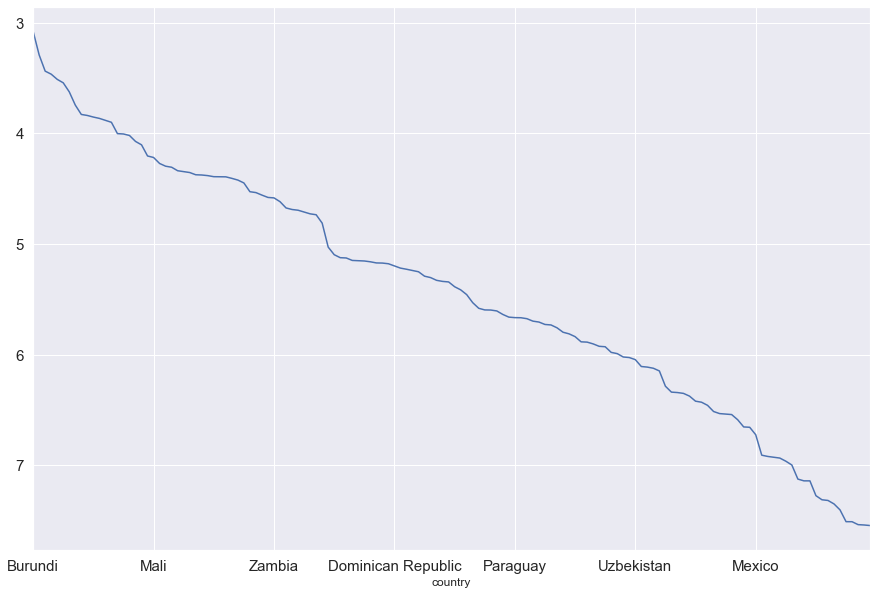

In [27]:
scores.set_index("country")["hscore_ave"].plot.line(figsize=(15,10),fontsize=15).invert_yaxis()

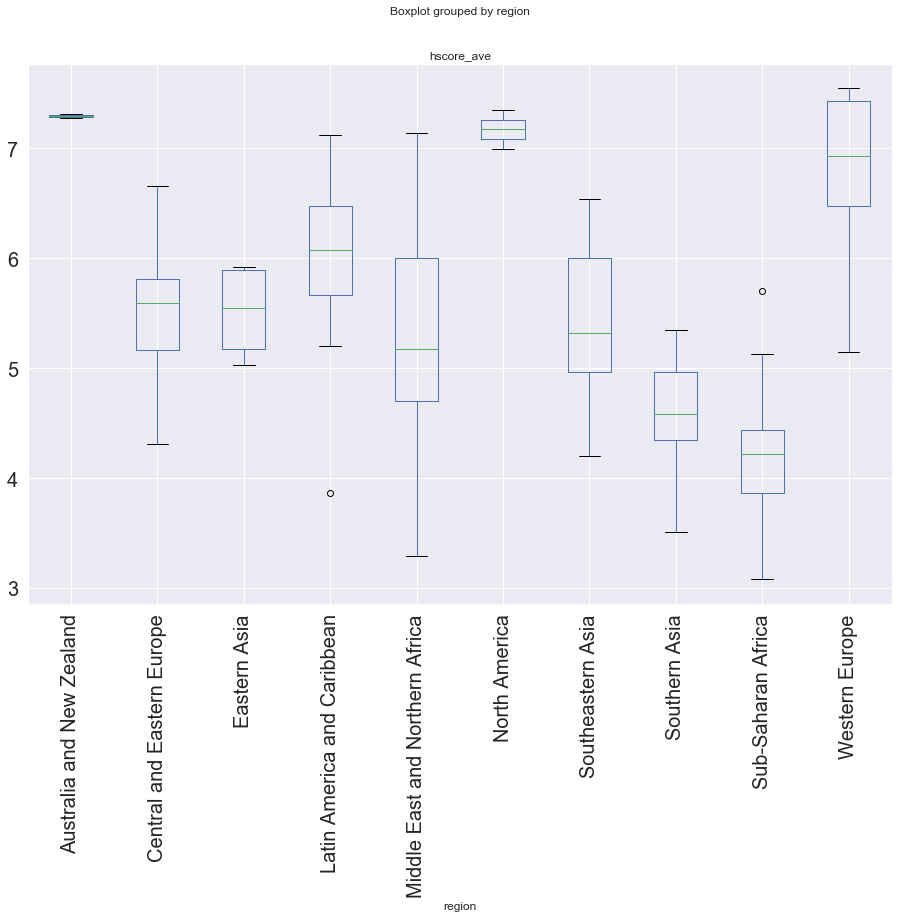

In [28]:
scores.boxplot(column='hscore_ave',by='region',rot=90,figsize=(15,10),fontsize=20)

In [29]:
region_scores = scores.groupby('region')['hscore_ave'].agg(['count','mean']).reset_index().sort_values(by="mean")
region_scores

,region,count,mean
8,Sub-Saharan Africa,31,4.190935
7,Southern Asia,7,4.580657
4,Middle East and Northern Africa,18,5.242200
6,Southeastern Asia,8,5.389475
1,Central and Eastern Europe,28,5.437643
2,Eastern Asia,4,5.514850
3,Latin America and Caribbean,20,6.003100
9,Western Europe,20,6.789330
5,North America,2,7.174700
0,Australia and New Zealand,2,7.294600


Pass back hscore ave per country back to main dataframe to use for comparisons.

In [30]:
df["hscore_ave"] = scores["hscore_ave"]

## GDP Per Capita Data

In [31]:
gdppcs = df[["country","region","hscore_ave","gdppc_15","gdppc_16","gdppc_17","gdppc_18","gdppc_19"]]
gdppcs.head()

,country,region,hscore_ave,gdppc_15,gdppc_16,gdppc_17,gdppc_18,gdppc_19
0,Switzerland,Western Europe,7.5114,1.39651,1.52733,1.564980,1.420,1.452
1,Iceland,Western Europe,7.5110,1.30232,1.42666,1.480633,1.343,1.380
2,Denmark,Western Europe,7.5460,1.32548,1.44178,1.482383,1.351,1.383
3,Norway,Western Europe,7.5410,1.45900,1.57744,1.616463,1.456,1.488
4,Canada,North America,7.3506,1.32629,1.44015,1.479204,1.330,1.365


In [32]:
gdppcs.tail()

,country,region,hscore_ave,gdppc_15,gdppc_16,gdppc_17,gdppc_18,gdppc_19
153,Rwanda,Sub-Saharan Africa,3.4386,0.22208,0.32846,0.368746,0.332,0.359
154,Benin,Sub-Saharan Africa,3.9010,0.28665,0.39499,0.431085,0.378,0.393
155,Syria,Middle East and Northern Africa,3.2922,0.66320,0.74719,0.777153,0.689,0.619
156,Burundi,Sub-Saharan Africa,3.0790,0.01530,0.06831,0.091623,0.091,0.046
157,Togo,Sub-Saharan Africa,3.5442,0.20868,0.28123,0.305445,0.259,0.275


In [33]:
gdppcs["gdppc_ave"] = gdppcs[["gdppc_15","gdppc_16","gdppc_17","gdppc_18","gdppc_19"]].mean(axis=1)
gdppcs.head()

C:\Users\derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,region,hscore_ave,gdppc_15,gdppc_16,gdppc_17,gdppc_18,gdppc_19,gdppc_ave
0,Switzerland,Western Europe,7.5114,1.39651,1.52733,1.564980,1.420,1.452,1.472164
1,Iceland,Western Europe,7.5110,1.30232,1.42666,1.480633,1.343,1.380,1.386523
2,Denmark,Western Europe,7.5460,1.32548,1.44178,1.482383,1.351,1.383,1.396729
3,Norway,Western Europe,7.5410,1.45900,1.57744,1.616463,1.456,1.488,1.519381
4,Canada,North America,7.3506,1.32629,1.44015,1.479204,1.330,1.365,1.388129


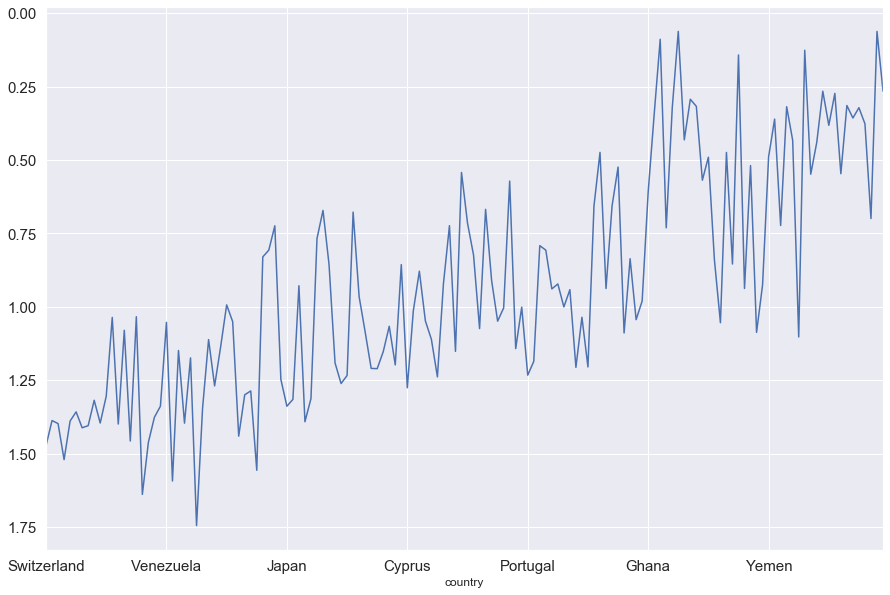

In [34]:
gdppcs.set_index("country")["gdppc_ave"].plot.line(figsize=(15,10),fontsize=15).invert_yaxis()

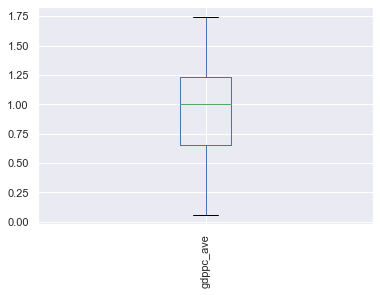

In [35]:
gdppcs.boxplot(column='gdppc_ave',rot=90)

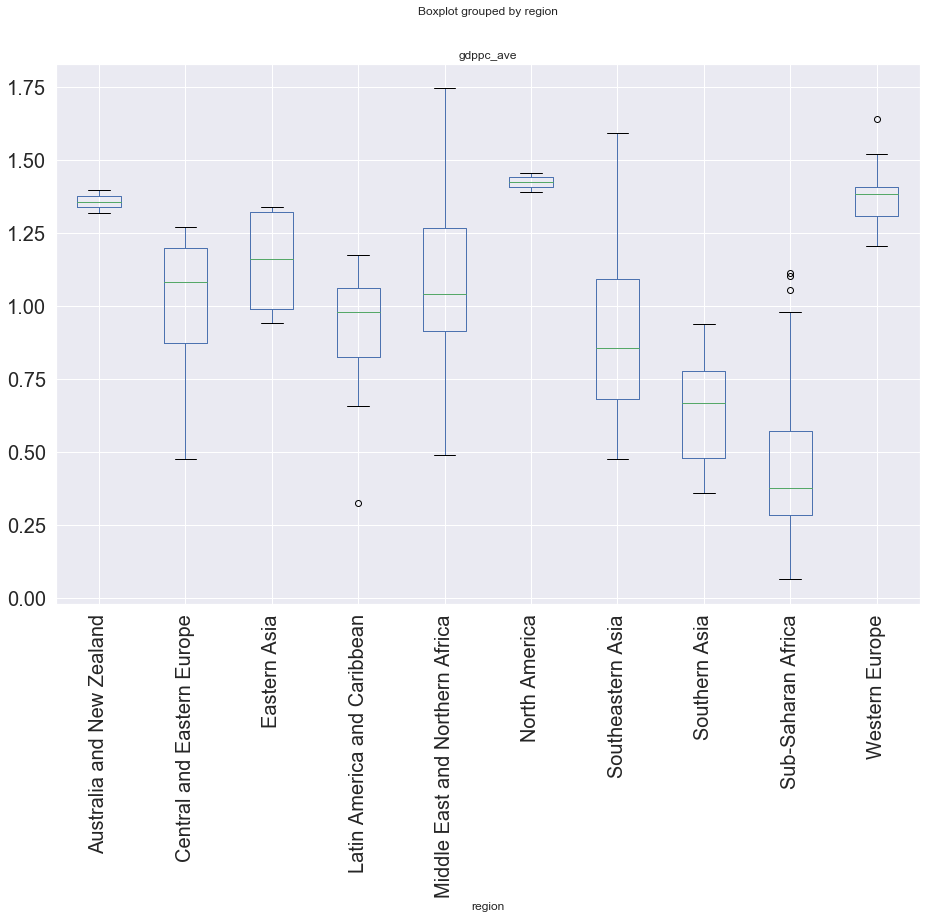

In [36]:
gdppcs.boxplot(column='gdppc_ave',by='region',rot=90,figsize=(15,10),fontsize=20)

In [37]:
region_gdppcs = gdppcs.groupby('region')['gdppc_ave'].agg(['count','mean']).reset_index().sort_values(by="mean")
region_gdppcs

,region,count,mean
8,Sub-Saharan Africa,31,0.457462
7,Southern Asia,7,0.638813
6,Southeastern Asia,8,0.913797
3,Latin America and Caribbean,20,0.921287
1,Central and Eastern Europe,28,1.019546
4,Middle East and Northern Africa,18,1.069628
2,Eastern Asia,4,1.149227
0,Australia and New Zealand,2,1.356197
9,Western Europe,20,1.375219
5,North America,2,1.422037


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


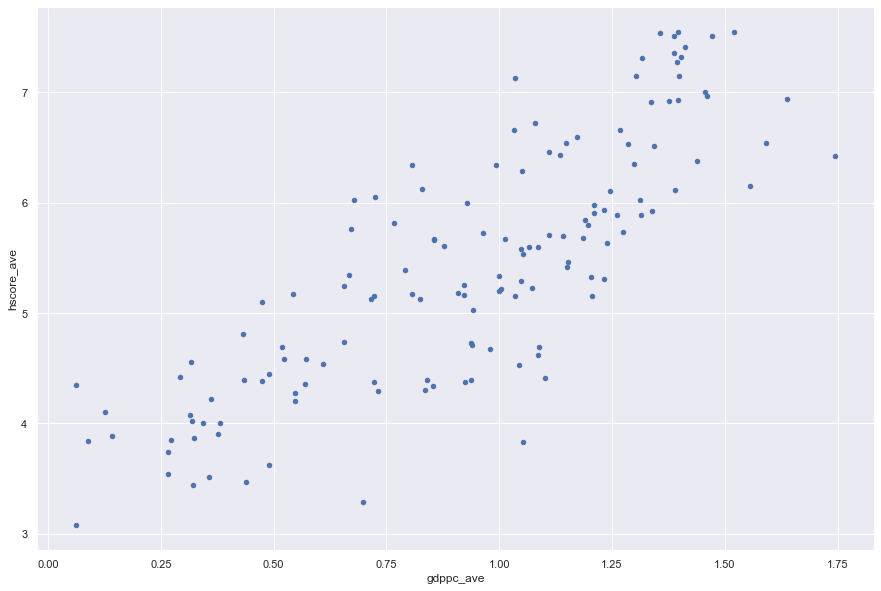

In [38]:
gdppcs.plot.scatter(x="gdppc_ave",y="hscore_ave",figsize=(15,10))

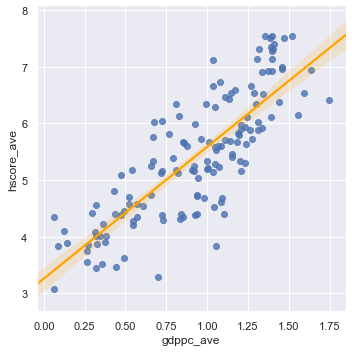

In [39]:
sns.lmplot(x="gdppc_ave",y="hscore_ave",data=gdppcs, line_kws={'color': 'orange'})

In [40]:
outcome_1, predictors_1 = patsy.dmatrices('hscore_ave ~ gdppc_ave', gdppcs)
mod_1 = sm.OLS(outcome_1, predictors_1)
type(mod_1)
res_1 = mod_1.fit()

print("p value:",res_1.pvalues[1])
print(res_1.pvalues[1] <= 0.001)
print(res_1.tvalues[1])

p value: 7.006921899424711e-35
True
16.67578011851938


In [41]:
df["gdppc_ave"] = gdppcs["gdppc_ave"]

## Social Data

In [42]:
socs = df[["country","region","hscore_ave","soc_15","soc_16","soc_17","soc_18","soc_19"]]
socs.head()

,country,region,hscore_ave,soc_15,soc_16,soc_17,soc_18,soc_19
0,Switzerland,Western Europe,7.5114,1.34951,1.14524,1.516912,1.549,1.526
1,Iceland,Western Europe,7.5110,1.40223,1.18326,1.610574,1.644,1.624
2,Denmark,Western Europe,7.5460,1.36058,1.16374,1.551122,1.590,1.573
3,Norway,Western Europe,7.5410,1.33095,1.12690,1.533524,1.582,1.582
4,Canada,North America,7.3506,1.32261,1.09610,1.481349,1.532,1.505


In [43]:
socs.tail()

,country,region,hscore_ave,soc_15,soc_16,soc_17,soc_18,soc_19
153,Rwanda,Sub-Saharan Africa,3.4386,0.77370,0.61586,0.945707,0.896,0.711
154,Benin,Sub-Saharan Africa,3.9010,0.35386,0.10419,0.435300,0.372,0.437
155,Syria,Middle East and Northern Africa,3.2922,0.47489,0.14866,0.396103,0.382,0.378
156,Burundi,Sub-Saharan Africa,3.0790,0.41587,0.23442,0.629794,0.627,0.447
157,Togo,Sub-Saharan Africa,3.5442,0.13995,0.00000,0.431883,0.474,0.572


In [44]:
socs["soc_ave"] = socs[["soc_15","soc_16","soc_17","soc_18","soc_19"]].mean(axis=1)
socs.head()

C:\Users\derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,region,hscore_ave,soc_15,soc_16,soc_17,soc_18,soc_19,soc_ave
0,Switzerland,Western Europe,7.5114,1.34951,1.14524,1.516912,1.549,1.526,1.417332
1,Iceland,Western Europe,7.5110,1.40223,1.18326,1.610574,1.644,1.624,1.492813
2,Denmark,Western Europe,7.5460,1.36058,1.16374,1.551122,1.590,1.573,1.447688
3,Norway,Western Europe,7.5410,1.33095,1.12690,1.533524,1.582,1.582,1.431075
4,Canada,North America,7.3506,1.32261,1.09610,1.481349,1.532,1.505,1.387412


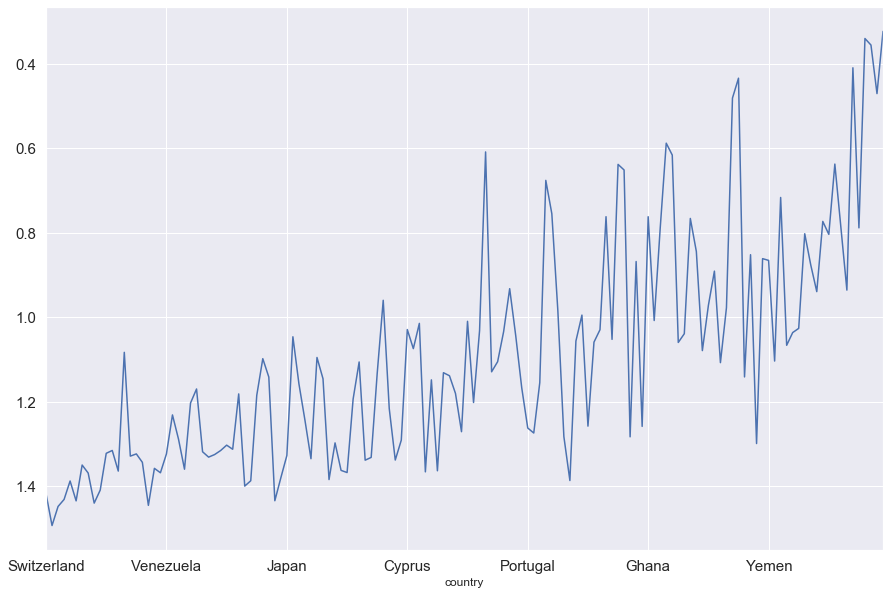

In [45]:
socs.set_index("country")["soc_ave"].plot.line(figsize=(15,10),fontsize=15).invert_yaxis()

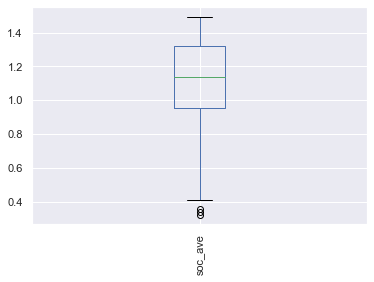

In [46]:
socs.boxplot(column='soc_ave',rot=90)

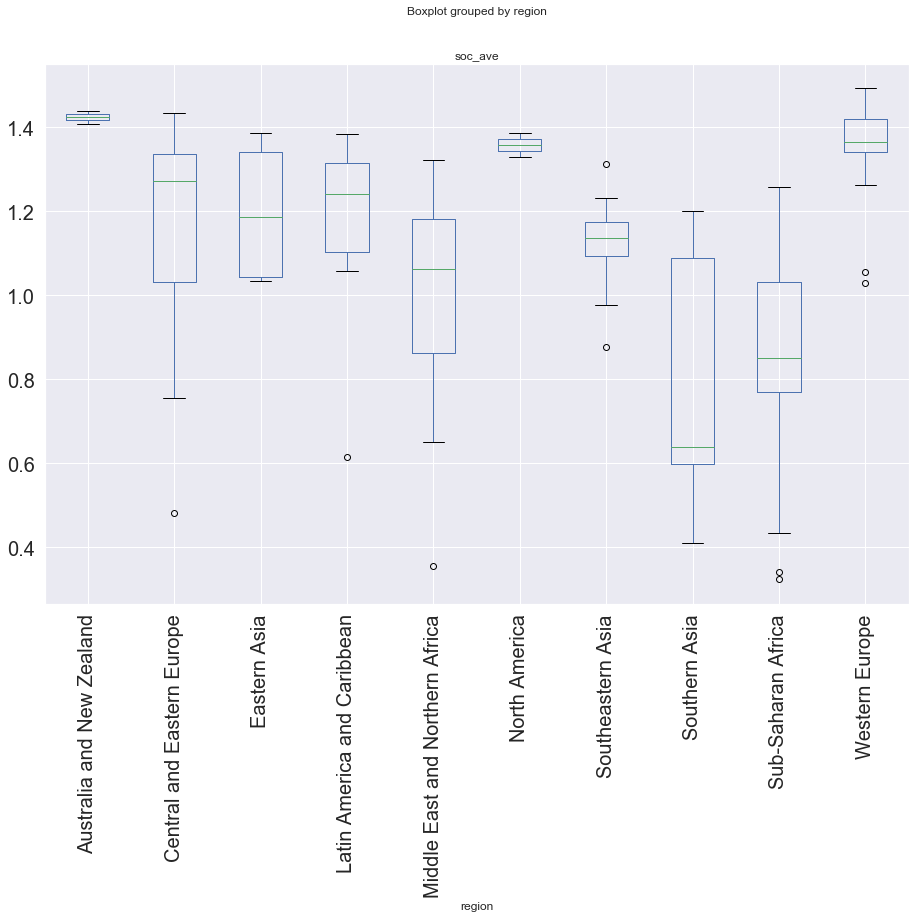

In [47]:
socs.boxplot(column='soc_ave',by='region',rot=90,figsize=(15,10),fontsize=20)

In [48]:
region_socs = socs.groupby('region')['soc_ave'].agg(['count','mean']).reset_index().sort_values(by="mean")
region_socs

,region,count,mean
7,Southern Asia,7,0.803835
8,Sub-Saharan Africa,31,0.857196
4,Middle East and Northern Africa,18,0.988240
6,Southeastern Asia,8,1.119247
1,Central and Eastern Europe,28,1.174770
3,Latin America and Caribbean,20,1.195414
2,Eastern Asia,4,1.198290
9,Western Europe,20,1.348271
5,North America,2,1.357991
0,Australia and New Zealand,2,1.424368


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


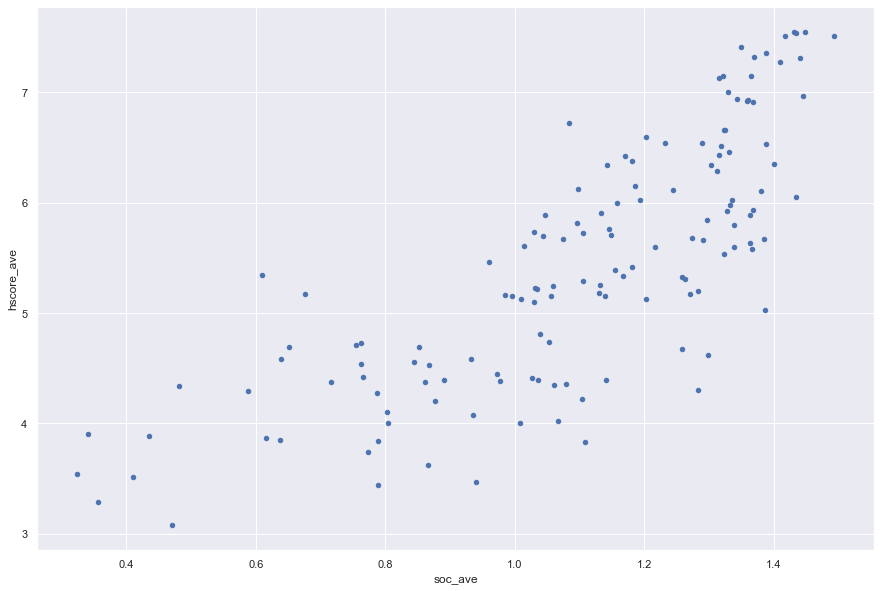

In [49]:
socs.plot.scatter(x="soc_ave",y="hscore_ave",figsize=(15,10))

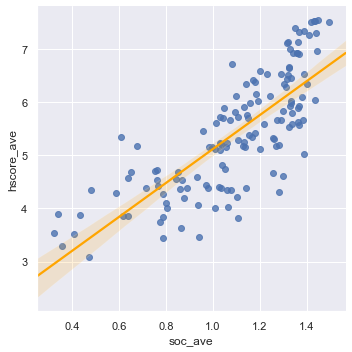

In [50]:
sns.lmplot(x="soc_ave",y="hscore_ave",data=socs, line_kws={'color': 'orange'})

In [51]:
outcome_2, predictors_2 = patsy.dmatrices('hscore_ave ~ soc_ave', socs)
mod_2 = sm.OLS(outcome_2, predictors_2)
type(mod_2)
res_2 = mod_2.fit()

print("p value:",res_2.pvalues[1])
print(res_2.pvalues[1] <= 0.001)
print(res_2.tvalues[1])

p value: 1.4947564619590055e-30
True
14.910299794164512


In [52]:
df["soc_ave"] = socs["soc_ave"]

## Life Expectancy Data

In [53]:
lexps = df[["country","region","hscore_ave","lexp_15","lexp_16","lexp_17","lexp_18","lexp_19"]]
lexps.head()

,country,region,hscore_ave,lexp_15,lexp_16,lexp_17,lexp_18,lexp_19
0,Switzerland,Western Europe,7.5114,0.94143,0.86303,0.858131,0.927,1.052
1,Iceland,Western Europe,7.5110,0.94784,0.86733,0.833552,0.914,1.026
2,Denmark,Western Europe,7.5460,0.87464,0.79504,0.792566,0.868,0.996
3,Norway,Western Europe,7.5410,0.88521,0.79579,0.796667,0.861,1.028
4,Canada,North America,7.3506,0.90563,0.82760,0.834558,0.896,1.039


In [54]:
lexps.tail()

,country,region,hscore_ave,lexp_15,lexp_16,lexp_17,lexp_18,lexp_19
153,Rwanda,Sub-Saharan Africa,3.4386,0.42864,0.31865,0.326425,0.400,0.614
154,Benin,Sub-Saharan Africa,3.9010,0.31910,0.21028,0.209930,0.240,0.397
155,Syria,Middle East and Northern Africa,3.2922,0.72193,0.62994,0.500533,0.539,0.440
156,Burundi,Sub-Saharan Africa,3.0790,0.22396,0.15747,0.151611,0.145,0.380
157,Togo,Sub-Saharan Africa,3.5442,0.28443,0.24811,0.247106,0.253,0.410


In [55]:
lexps["lexp_ave"] = lexps[["lexp_15","lexp_16","lexp_17","lexp_18","lexp_19"]].mean(axis=1)
lexps.head()

C:\Users\derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,region,hscore_ave,lexp_15,lexp_16,lexp_17,lexp_18,lexp_19,lexp_ave
0,Switzerland,Western Europe,7.5114,0.94143,0.86303,0.858131,0.927,1.052,0.928318
1,Iceland,Western Europe,7.5110,0.94784,0.86733,0.833552,0.914,1.026,0.917744
2,Denmark,Western Europe,7.5460,0.87464,0.79504,0.792566,0.868,0.996,0.865249
3,Norway,Western Europe,7.5410,0.88521,0.79579,0.796667,0.861,1.028,0.873333
4,Canada,North America,7.3506,0.90563,0.82760,0.834558,0.896,1.039,0.900558


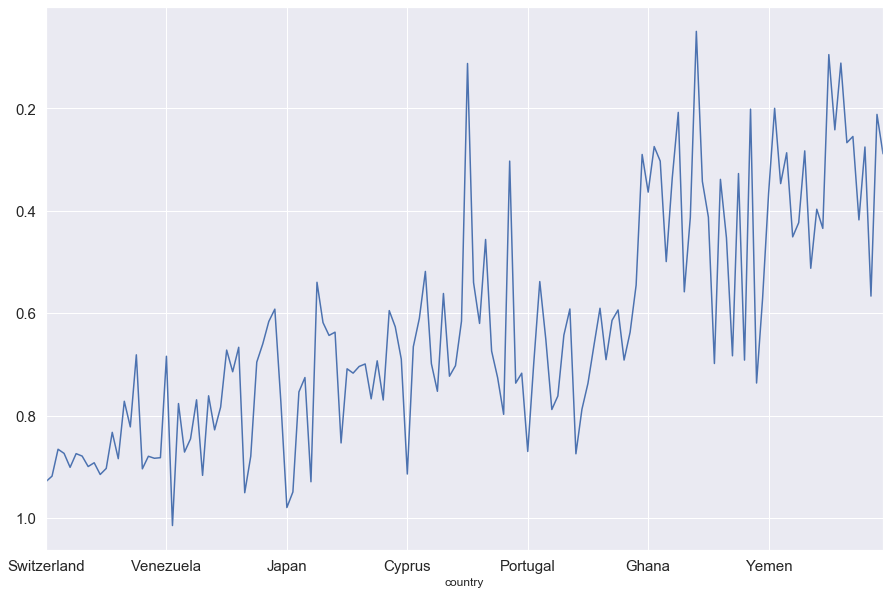

In [56]:
lexps.set_index("country")["lexp_ave"].plot.line(figsize=(15,10),fontsize=15).invert_yaxis()

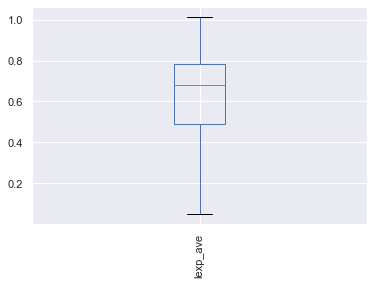

In [57]:
lexps.boxplot(column='lexp_ave',rot=90)

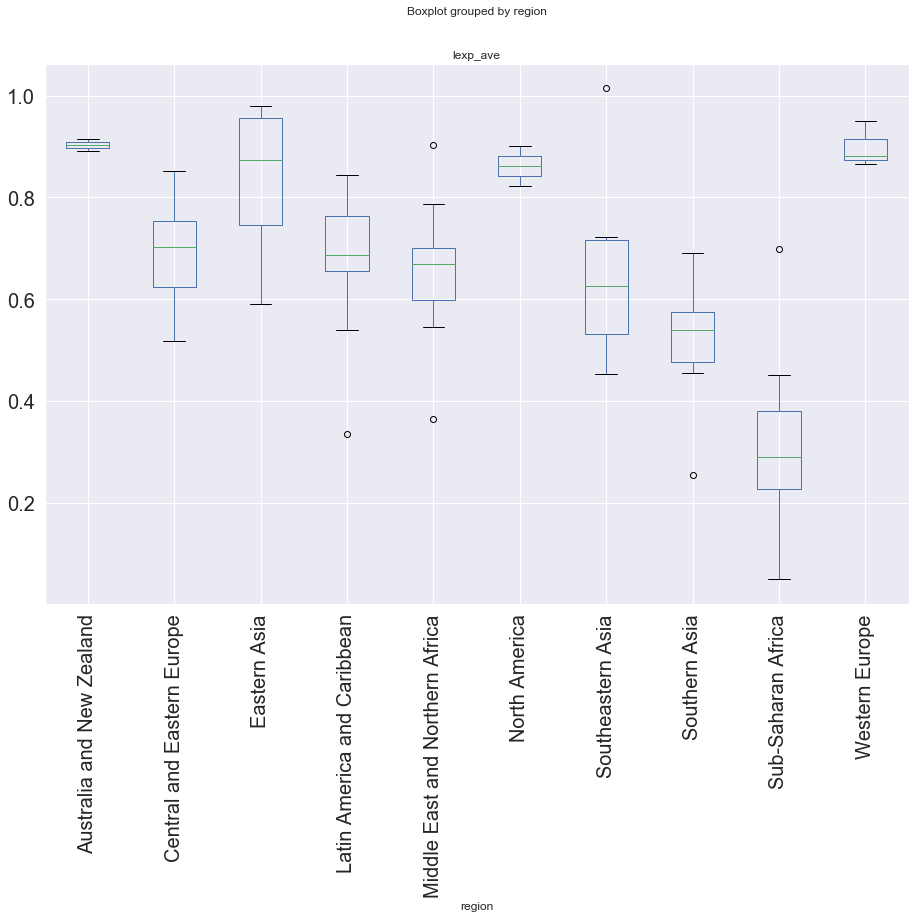

In [58]:
lexps.boxplot(column='lexp_ave',by='region',rot=90,figsize=(15,10),fontsize=20)

In [59]:
region_lexps = lexps.groupby('region')['lexp_ave'].agg(['count','mean']).reset_index().sort_values(by="mean")
region_lexps

,region,count,mean
8,Sub-Saharan Africa,31,0.302021
7,Southern Asia,7,0.513089
6,Southeastern Asia,8,0.650897
4,Middle East and Northern Africa,18,0.659672
3,Latin America and Caribbean,20,0.688313
1,Central and Eastern Europe,28,0.696003
2,Eastern Asia,4,0.829065
5,North America,2,0.861086
9,Western Europe,20,0.893445
0,Australia and New Zealand,2,0.903074


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


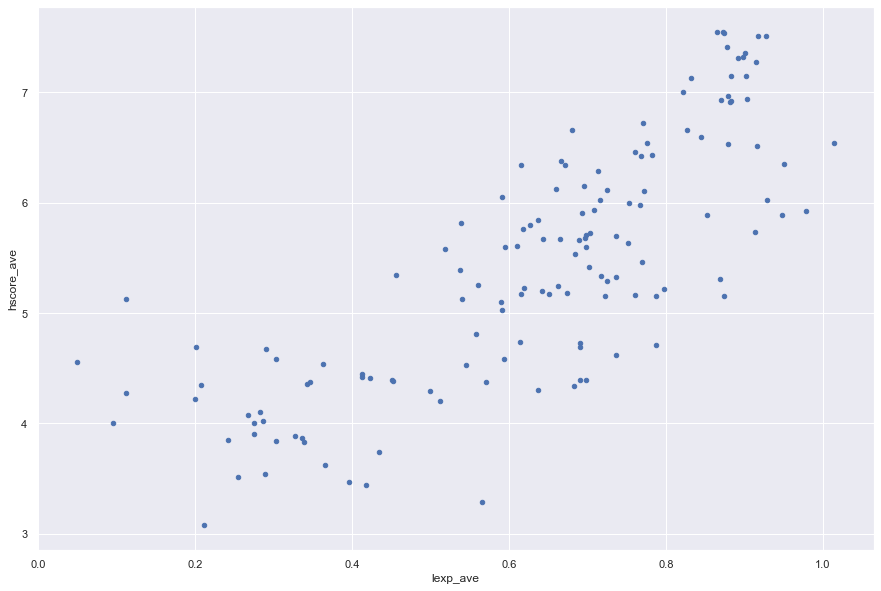

In [60]:
lexps.plot.scatter(x="lexp_ave",y="hscore_ave",figsize=(15,10))

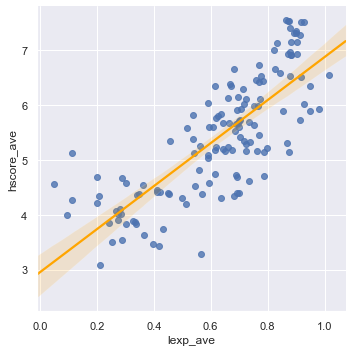

In [61]:
sns.lmplot(x="lexp_ave",y="hscore_ave",data=lexps, line_kws={'color': 'orange'})

In [62]:
outcome_3, predictors_3 = patsy.dmatrices('hscore_ave ~ lexp_ave', lexps)
mod_3 = sm.OLS(outcome_3, predictors_3)
type(mod_3)
res_3 = mod_3.fit()

print("p value:",res_3.pvalues[1])
print(res_3.pvalues[1] <= 0.001)
print(res_3.tvalues[1])

p value: 1.9690785586177428e-31
True
15.264740697671046


In [63]:
df["lexp_ave"] = lexps["lexp_ave"]

### Freedom Data

In [64]:
frees = df[["country","region","hscore_ave","free_15","free_16","free_17","free_18","free_19"]]
frees.head()

,country,region,hscore_ave,free_15,free_16,free_17,free_18,free_19
0,Switzerland,Western Europe,7.5114,0.66557,0.58557,0.620071,0.660,0.572
1,Iceland,Western Europe,7.5110,0.62877,0.56624,0.627163,0.677,0.591
2,Denmark,Western Europe,7.5460,0.64938,0.57941,0.626007,0.683,0.592
3,Norway,Western Europe,7.5410,0.66973,0.59609,0.635423,0.686,0.603
4,Canada,North America,7.3506,0.63297,0.57370,0.611101,0.653,0.584


In [65]:
frees.tail()

,country,region,hscore_ave,free_15,free_16,free_17,free_18,free_19
153,Rwanda,Sub-Saharan Africa,3.4386,0.59201,0.54320,0.581844,0.636,0.555
154,Benin,Sub-Saharan Africa,3.9010,0.48450,0.39747,0.425963,0.440,0.349
155,Syria,Middle East and Northern Africa,3.2922,0.15684,0.06912,0.081539,0.088,0.013
156,Burundi,Sub-Saharan Africa,3.0790,0.11850,0.04320,0.059901,0.065,0.220
157,Togo,Sub-Saharan Africa,3.5442,0.36453,0.34678,0.380426,0.434,0.293


In [66]:
frees["free_ave"] = frees[["free_15","free_16","free_17","free_18","free_19"]].mean(axis=1)
frees.head()

C:\Users\derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,region,hscore_ave,free_15,free_16,free_17,free_18,free_19,free_ave
0,Switzerland,Western Europe,7.5114,0.66557,0.58557,0.620071,0.660,0.572,0.620642
1,Iceland,Western Europe,7.5110,0.62877,0.56624,0.627163,0.677,0.591,0.618035
2,Denmark,Western Europe,7.5460,0.64938,0.57941,0.626007,0.683,0.592,0.625959
3,Norway,Western Europe,7.5410,0.66973,0.59609,0.635423,0.686,0.603,0.638049
4,Canada,North America,7.3506,0.63297,0.57370,0.611101,0.653,0.584,0.610954


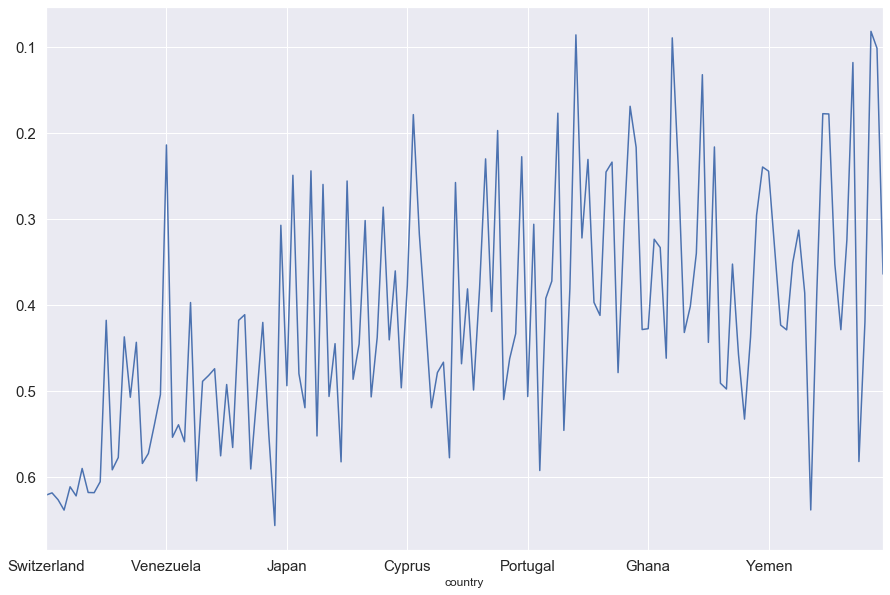

In [67]:
frees.set_index("country")["free_ave"].plot.line(figsize=(15,10),fontsize=15).invert_yaxis()

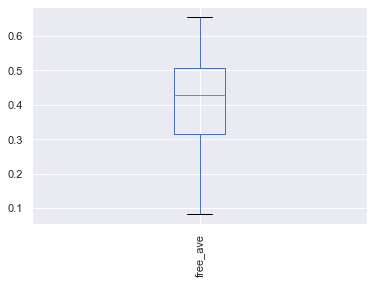

In [68]:
frees.boxplot(column='free_ave',rot=90)

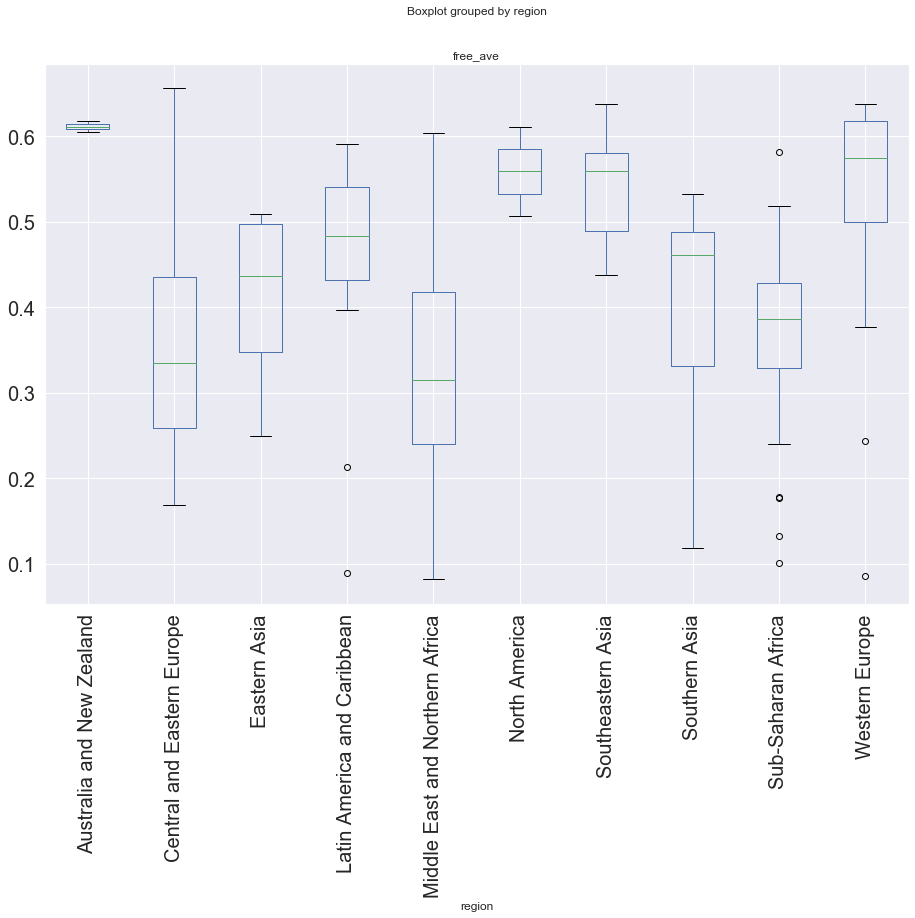

In [69]:
frees.boxplot(column='free_ave',by='region',rot=90,figsize=(15,10),fontsize=20)

In [70]:
region_frees = frees.groupby('region')['free_ave'].agg(['count','mean']).reset_index().sort_values(by="mean")
region_frees

,region,count,mean
4,Middle East and Northern Africa,18,0.334960
1,Central and Eastern Europe,28,0.352840
8,Sub-Saharan Africa,31,0.366487
7,Southern Asia,7,0.392867
2,Eastern Asia,4,0.408103
3,Latin America and Caribbean,20,0.456747
9,Western Europe,20,0.518400
6,Southeastern Asia,8,0.540831
5,North America,2,0.558918
0,Australia and New Zealand,2,0.611413


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


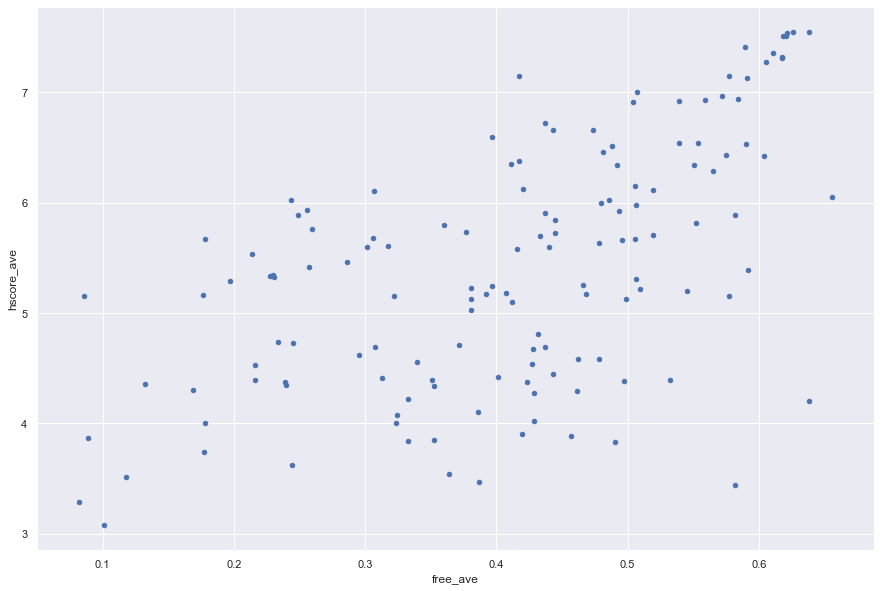

In [71]:
frees.plot.scatter(x="free_ave",y="hscore_ave",figsize=(15,10))

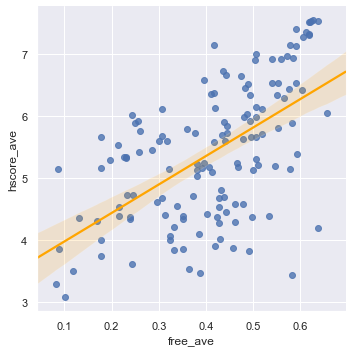

In [72]:
sns.lmplot(x="free_ave",y="hscore_ave",data=frees, line_kws={'color': 'orange'})

In [73]:
outcome_4, predictors_4 = patsy.dmatrices('hscore_ave ~ free_ave', frees)
mod_4 = sm.OLS(outcome_4, predictors_4)
type(mod_4)
res_4 = mod_4.fit()

print("p value:",res_4.pvalues[1])
print(res_4.pvalues[1] <= 0.001)
print(res_4.tvalues[1])

p value: 4.013705801354939e-14
True
8.433433234841782


In [74]:
df["free_ave"] = frees["free_ave"]

### Goverment Trust Data

In [75]:
govs = df[["country","region","hscore_ave","gov_15","gov_16","gov_17","gov_18","gov_19"]]
govs.head()

,country,region,hscore_ave,gov_15,gov_16,gov_17,gov_18,gov_19
0,Switzerland,Western Europe,7.5114,0.41978,0.41203,0.367007,0.357,0.343
1,Iceland,Western Europe,7.5110,0.14145,0.14975,0.153527,0.138,0.118
2,Denmark,Western Europe,7.5460,0.48357,0.44453,0.400770,0.408,0.410
3,Norway,Western Europe,7.5410,0.36503,0.35776,0.315964,0.340,0.341
4,Canada,North America,7.3506,0.32957,0.31329,0.287372,0.291,0.308


In [76]:
govs.tail()

,country,region,hscore_ave,gov_15,gov_16,gov_17,gov_18,gov_19
153,Rwanda,Sub-Saharan Africa,3.4386,0.55191,0.50521,0.455220,0.444,0.411
154,Benin,Sub-Saharan Africa,3.9010,0.08010,0.06681,0.060929,0.067,0.082
155,Syria,Middle East and Northern Africa,3.2922,0.18906,0.17233,0.151347,0.144,0.141
156,Burundi,Sub-Saharan Africa,3.0790,0.10062,0.09419,0.084148,0.076,0.180
157,Togo,Sub-Saharan Africa,3.5442,0.10731,0.11587,0.095665,0.101,0.085


In [77]:
govs["gov_ave"] = govs[["gov_15","gov_16","gov_17","gov_18","gov_19"]].mean(axis=1)
govs.head()

C:\Users\derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,region,hscore_ave,gov_15,gov_16,gov_17,gov_18,gov_19,gov_ave
0,Switzerland,Western Europe,7.5114,0.41978,0.41203,0.367007,0.357,0.343,0.379763
1,Iceland,Western Europe,7.5110,0.14145,0.14975,0.153527,0.138,0.118,0.140145
2,Denmark,Western Europe,7.5460,0.48357,0.44453,0.400770,0.408,0.410,0.429374
3,Norway,Western Europe,7.5410,0.36503,0.35776,0.315964,0.340,0.341,0.343951
4,Canada,North America,7.3506,0.32957,0.31329,0.287372,0.291,0.308,0.305846


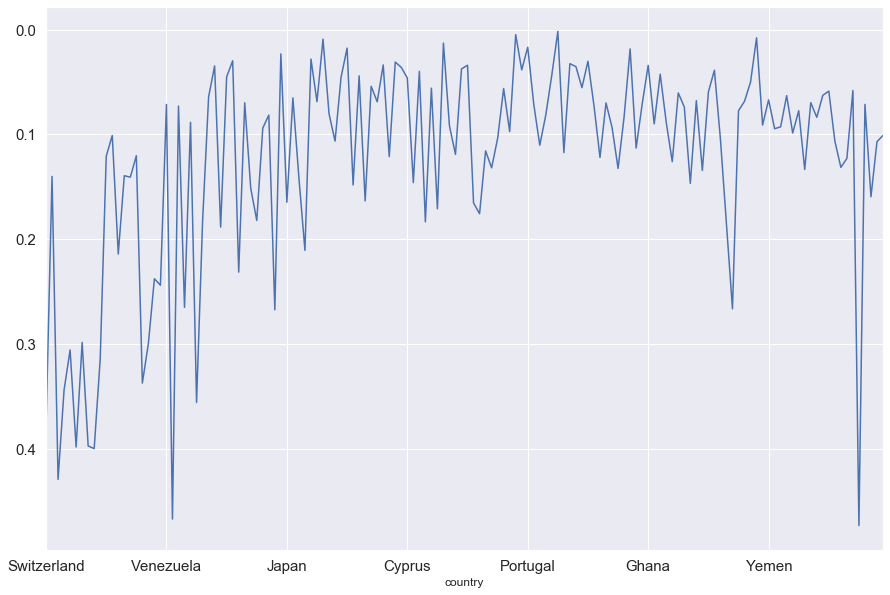

In [78]:
govs.set_index("country")["gov_ave"].plot.line(figsize=(15,10),fontsize=15).invert_yaxis()

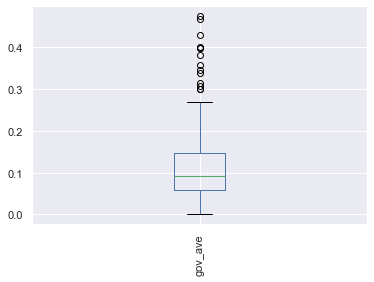

In [79]:
govs.boxplot(column='gov_ave',rot=90)

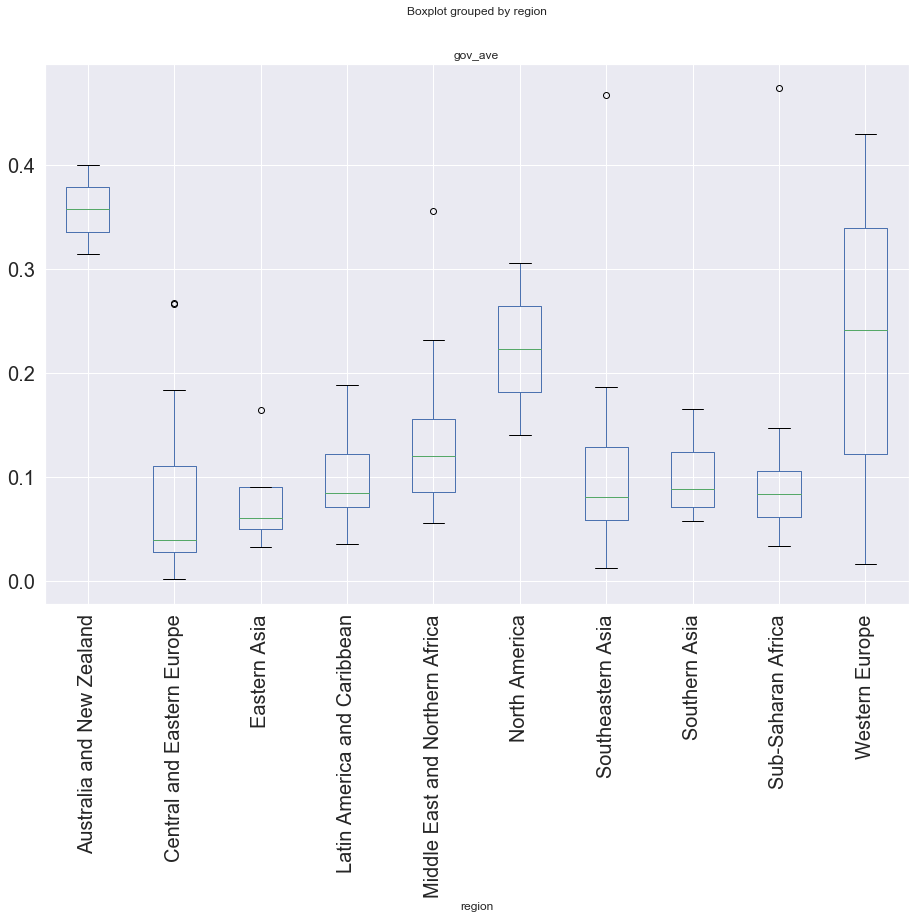

In [80]:
govs.boxplot(column='gov_ave',by='region',rot=90,figsize=(15,10),fontsize=20)

In [81]:
region_govs = govs.groupby('region')['gov_ave'].agg(['count','mean']).reset_index().sort_values(by="mean")
region_govs

,region,count,mean
1,Central and Eastern Europe,28,0.076454
2,Eastern Asia,4,0.079684
3,Latin America and Caribbean,20,0.095129
8,Sub-Saharan Africa,31,0.096938
7,Southern Asia,7,0.100357
6,Southeastern Asia,8,0.129636
4,Middle East and Northern Africa,18,0.135227
5,North America,2,0.223345
9,Western Europe,20,0.225862
0,Australia and New Zealand,2,0.357294


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


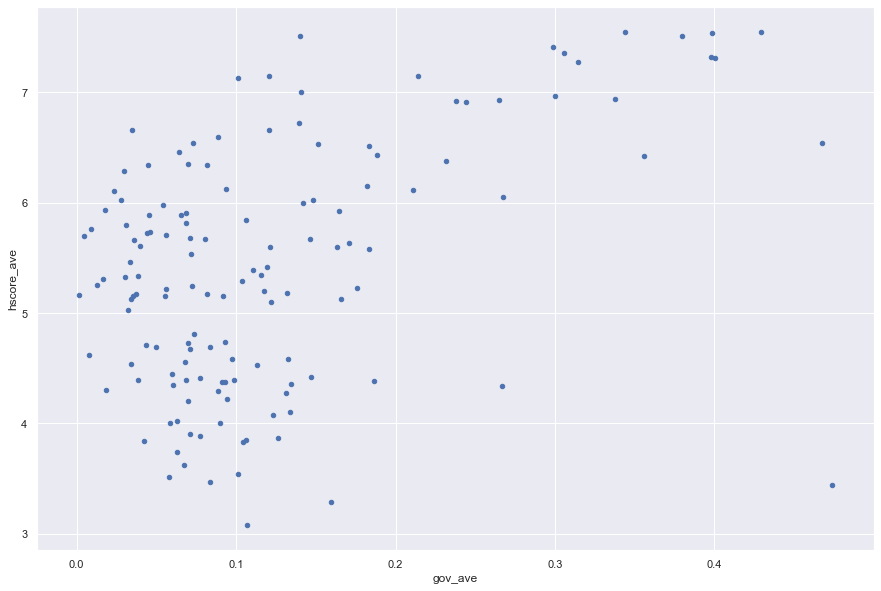

In [82]:
govs.plot.scatter(x="gov_ave",y="hscore_ave",figsize=(15,10))

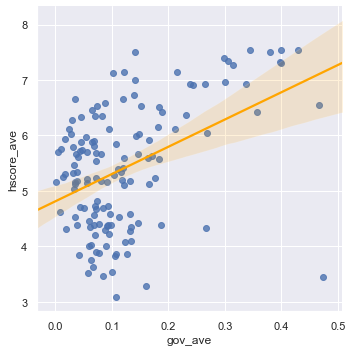

In [83]:
sns.lmplot(x="gov_ave",y="hscore_ave",data=govs, line_kws={'color': 'orange'})

In [84]:
outcome_5, predictors_5 = patsy.dmatrices('hscore_ave ~ gov_ave', govs)
mod_5 = sm.OLS(outcome_5, predictors_5)
type(mod_5)
res_5 = mod_5.fit()

print("p value:",res_5.pvalues[1])
print(res_5.pvalues[1] <= 0.001)
print(res_5.tvalues[1])

p value: 2.071461948190751e-08
True
5.952570660716443


In [85]:
df["gov_ave"] = govs["gov_ave"]

### Generosity Data

In [86]:
gens = df[["country","region","hscore_ave","gen_15","gen_16","gen_17","gen_18","gen_19"]]
gens.head()

,country,region,hscore_ave,gen_15,gen_16,gen_17,gen_18,gen_19
0,Switzerland,Western Europe,7.5114,0.29678,0.28083,0.290549,0.256,0.263
1,Iceland,Western Europe,7.5110,0.43630,0.47678,0.475540,0.353,0.354
2,Denmark,Western Europe,7.5460,0.34139,0.36171,0.355280,0.284,0.252
3,Norway,Western Europe,7.5410,0.34699,0.37895,0.362012,0.286,0.271
4,Canada,North America,7.3506,0.45811,0.44834,0.435540,0.321,0.285


In [87]:
gens.tail()

,country,region,hscore_ave,gen_15,gen_16,gen_17,gen_18,gen_19
153,Rwanda,Sub-Saharan Africa,3.4386,0.22628,0.23552,0.252756,0.200,0.217
154,Benin,Sub-Saharan Africa,3.9010,0.18260,0.20180,0.207948,0.163,0.175
155,Syria,Middle East and Northern Africa,3.2922,0.47179,0.48397,0.493664,0.376,0.331
156,Burundi,Sub-Saharan Africa,3.0790,0.19727,0.20290,0.204435,0.149,0.176
157,Togo,Sub-Saharan Africa,3.5442,0.16681,0.17517,0.196896,0.158,0.177


In [88]:
gens["gen_ave"] = gens[["gen_15","gen_16","gen_17","gen_18","gen_19"]].mean(axis=1)
gens.head()

C:\Users\derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,region,hscore_ave,gen_15,gen_16,gen_17,gen_18,gen_19,gen_ave
0,Switzerland,Western Europe,7.5114,0.29678,0.28083,0.290549,0.256,0.263,0.277432
1,Iceland,Western Europe,7.5110,0.43630,0.47678,0.475540,0.353,0.354,0.419124
2,Denmark,Western Europe,7.5460,0.34139,0.36171,0.355280,0.284,0.252,0.318876
3,Norway,Western Europe,7.5410,0.34699,0.37895,0.362012,0.286,0.271,0.328990
4,Canada,North America,7.3506,0.45811,0.44834,0.435540,0.321,0.285,0.389598


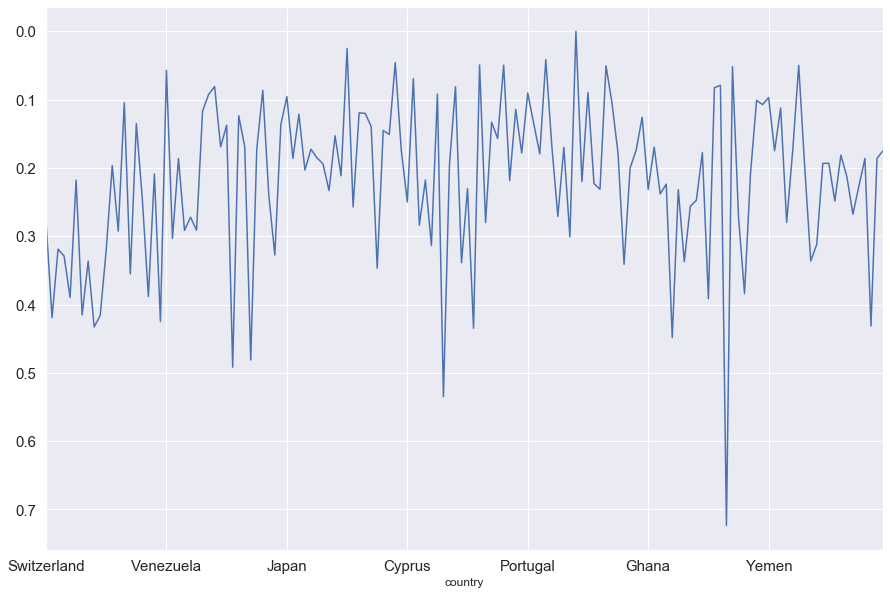

In [89]:
gens.set_index("country")["gen_ave"].plot.line(figsize=(15,10),fontsize=15).invert_yaxis()

In [90]:
gens[gens["gen_ave"] == gens["gen_ave"].max()]

,country,region,hscore_ave,gen_15,gen_16,gen_17,gen_18,gen_19,gen_ave
128,Myanmar,Southeastern Asia,4.383,0.79588,0.81971,0.838075,0.598,0.566,0.723533


Aung San Suu Kyi

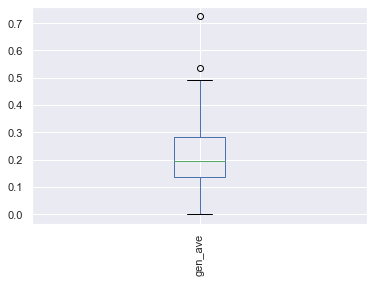

In [91]:
gens.boxplot(column='gen_ave',rot=90)

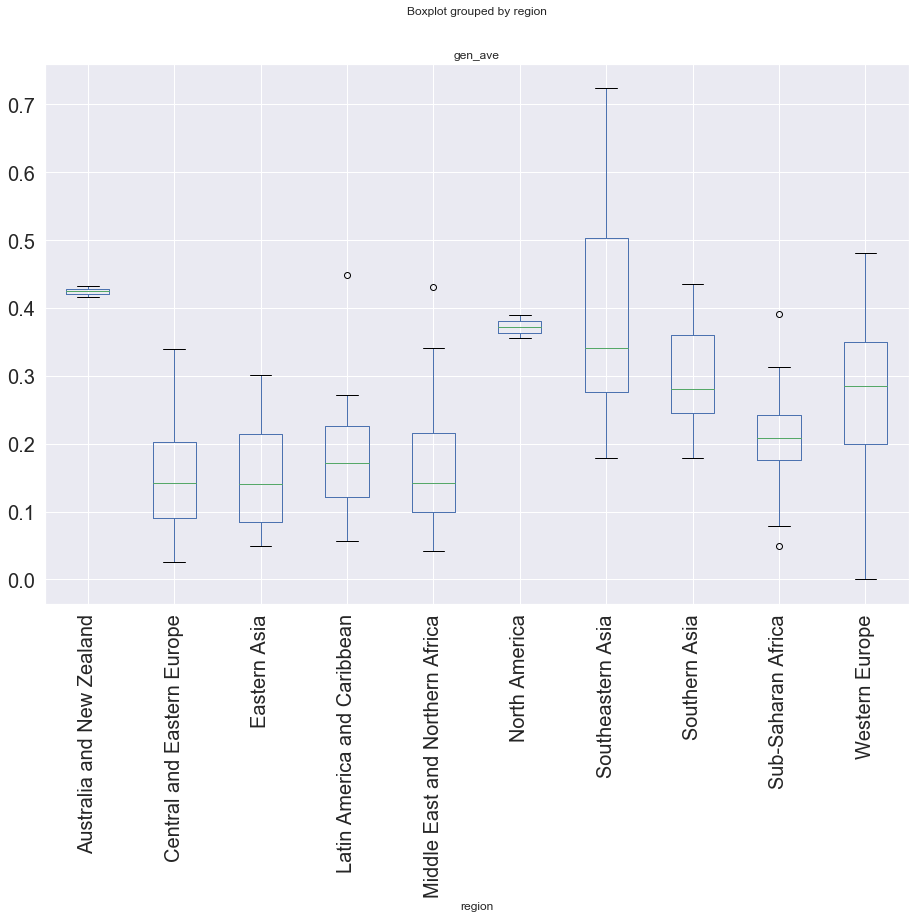

In [92]:
gens.boxplot(column='gen_ave',by='region',rot=90,figsize=(15,10),fontsize=20)

In [93]:
region_gens = gens.groupby('region')['gen_ave'].agg(['count','mean']).reset_index().sort_values(by="mean")
region_gens

,region,count,mean
1,Central and Eastern Europe,28,0.154962
2,Eastern Asia,4,0.157987
4,Middle East and Northern Africa,18,0.172883
3,Latin America and Caribbean,20,0.180394
8,Sub-Saharan Africa,31,0.209462
9,Western Europe,20,0.272230
7,Southern Asia,7,0.300888
5,North America,2,0.372339
6,Southeastern Asia,8,0.388897
0,Australia and New Zealand,2,0.424441


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


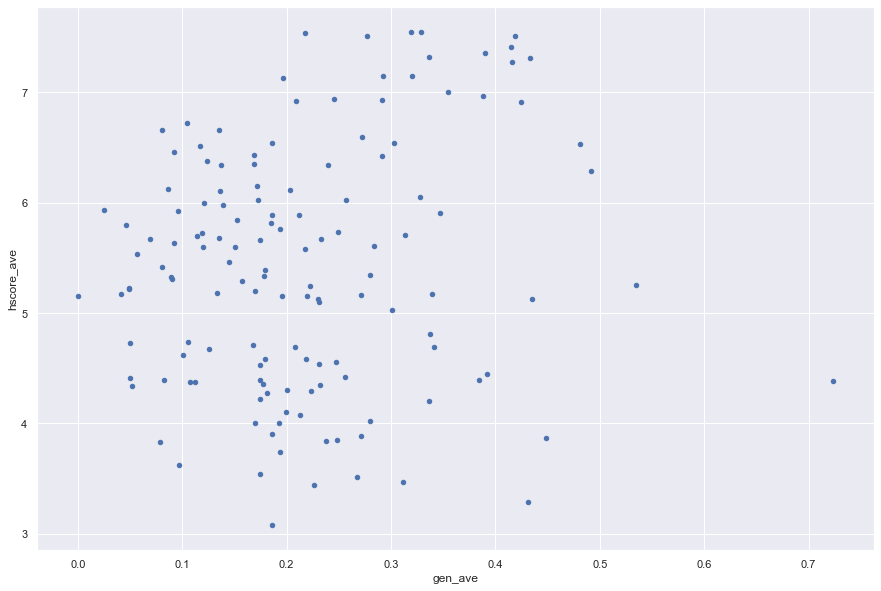

In [94]:
gens.plot.scatter(x="gen_ave",y="hscore_ave",figsize=(15,10))

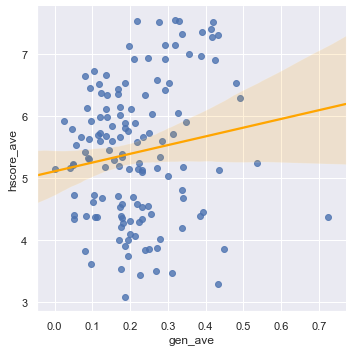

In [95]:
sns.lmplot(x="gen_ave",y="hscore_ave",data=gens, line_kws={'color': 'orange'})

In [96]:
outcome_6, predictors_6 = patsy.dmatrices('hscore_ave ~ gen_ave', gens)
mod_6 = sm.OLS(outcome_6, predictors_6)
type(mod_6)
res_6 = mod_6.fit()

print("p value:",res_6.pvalues[1])
print(res_6.pvalues[1] <= 0.001)
print(res_6.tvalues[1])

p value: 0.07654183862266838
False
1.784486416092109


In [97]:
df["gen_ave"] = gens["gen_ave"]

In [98]:
modgens = gens.drop([128])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


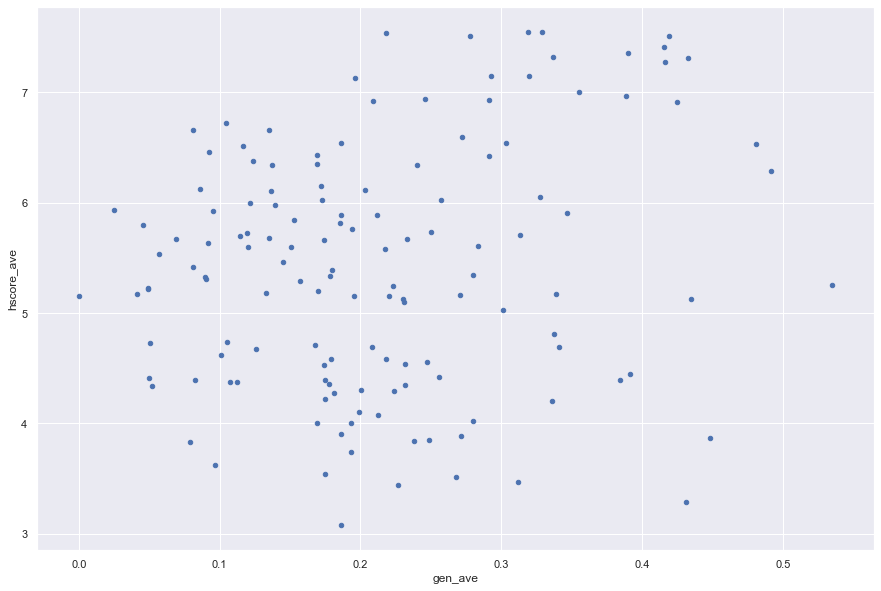

In [99]:
modgens.plot.scatter(x="gen_ave",y="hscore_ave",figsize=(15,10))

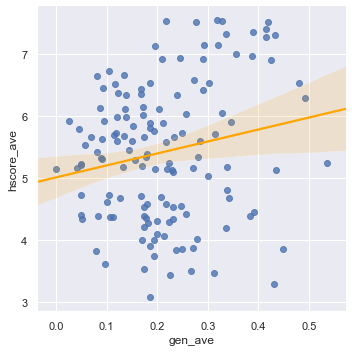

In [100]:
sns.lmplot(x="gen_ave",y="hscore_ave",data=modgens, line_kws={'color': 'orange'})

In [101]:
outcome_7, predictors_7 = patsy.dmatrices('hscore_ave ~ gen_ave', modgens)
mod_7 = sm.OLS(outcome_7, predictors_7)
type(mod_7)
res_7 = mod_7.fit()

print("p value:",res_7.pvalues[1])
print(res_7.pvalues[1] <= 0.001)
print(res_7.tvalues[1])

p value: 0.023030469890579344
False
2.2987829623293625


## Average Datas

In [102]:
aves = df[["country","region","hscore_ave","gdppc_ave","soc_ave","lexp_ave","free_ave","gov_ave","gen_ave"]]
aves.head()

,country,region,hscore_ave,gdppc_ave,soc_ave,lexp_ave,free_ave,gov_ave,gen_ave
0,Switzerland,Western Europe,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432
1,Iceland,Western Europe,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124
2,Denmark,Western Europe,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876
3,Norway,Western Europe,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990
4,Canada,North America,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598


In [103]:
print("GDP per Capita effect on Happiness Score: p and t values:")
print(res_1.pvalues[1], res_1.tvalues[1])
print("Family/Social effect on Happiness Score: p and t values:")
print(res_2.pvalues[1], res_2.tvalues[1])
print("Life Expectancy effect on Happiness Score: p and t values:")
print(res_3.pvalues[1], res_3.tvalues[1])
print("Freedom effect on Happiness Score: p and t values:")
print(res_4.pvalues[1], res_4.tvalues[1])
print("Trust in Government effect on Happiness Score: p and t values:")
print(res_5.pvalues[1], res_5.tvalues[1])
print("Generosity effect on Happiness Score: p and t values:")
print(res_6.pvalues[1], res_6.tvalues[1])

GDP per Capita effect on Happiness Score: p and t values:
7.006921899424711e-35 16.67578011851938
Family/Social effect on Happiness Score: p and t values:
1.4947564619590055e-30 14.910299794164512
Life Expectancy effect on Happiness Score: p and t values:
1.9690785586177428e-31 15.264740697671046
Freedom effect on Happiness Score: p and t values:
4.013705801354939e-14 8.433433234841782
Trust in Government effect on Happiness Score: p and t values:
2.071461948190751e-08 5.952570660716443
Generosity effect on Happiness Score: p and t values:
0.07654183862266838 1.784486416092109


The t-values are decreasing in importances, with most weight given to GDP per Capita, Family/Social Life, and Life Expectancy.

## With More Time

- Explore change of rank over years, and visualize that change and try to make a predictive model
- use different combinations of patsy.dmatrices('hscore_ave ~ x + y + z', aves) to further look into what was given more weight in the original calculation
- Explore individual years rather than just the average between years to see if weight formula changed; especially given the "Dystopia Residual"

In [105]:
aves.head()

,country,region,hscore_ave,gdppc_ave,soc_ave,lexp_ave,free_ave,gov_ave,gen_ave
0,Switzerland,Western Europe,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432
1,Iceland,Western Europe,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124
2,Denmark,Western Europe,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876
3,Norway,Western Europe,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990
4,Canada,North America,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598


In [130]:
# Draw heatmaps for result of grid search.
def draw_GS_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='k')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps for result of grid search.
def draw_DT_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

In [138]:
X = aves[['gdppc_ave',
            'soc_ave',
            'lexp_ave',
            'free_ave',
            'gov_ave',
            'gen_ave']].to_numpy()

Y = aves[['hscore_ave']].apply(lambda x: [-1 if y <= 6.5 else 1 for y in x]).to_numpy()

print(X.shape,Y.shape)

(140, 6) (140, 1)


In [139]:
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape) # (51490, 17)
print(Y.shape) # (51490, 1)
print(X_and_Y[0])  

X_shuffled = X_and_Y[:,[0,1,2,3,4,5]]
Y_shuffled = X_and_Y[:,6]

print(X_shuffled[0])  
print(Y_shuffled[0])

(140, 6)
(140, 1)
[ 1.23785187  1.36324222  0.75215166  0.47822429  0.17105578  0.09178416
 -1.        ]
[1.23785187 1.36324222 0.75215166 0.47822429 0.17105578 0.09178416]
-1.0


In [140]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import scipy.io as sio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [141]:
X_train = X_shuffled[:112] # Shape: (40,2)
Y_train = Y_shuffled[:112]          # Shape: (40,)
X_test = X_shuffled[-28:]  # Shape: (160,2)
Y_test = Y_shuffled[-28:]           # Shape: (160,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(112, 6)
(112,)
(28, 6)
(28,)


C:\Users\derek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


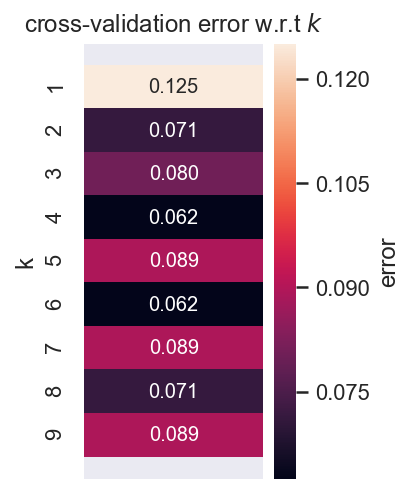

Best number of nearest neighbors (k): 4
Test error: 0.1071428571428571


In [142]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_GS_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

C:\Users\derek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


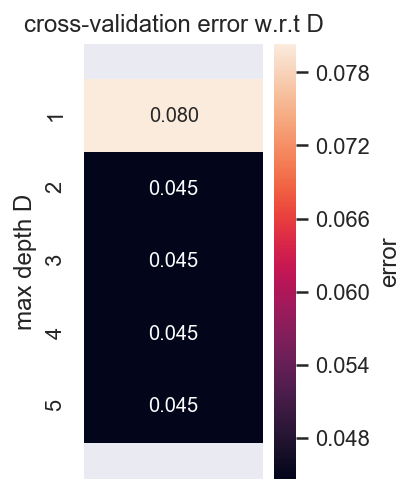

Best max depth D: {'max_depth': 2}
Test error: 0.0714285714285714


In [143]:
# Perform grid search for best max depth.

# 1. Create a decision tree classifier.
estimator = tree.DecisionTreeClassifier(criterion="entropy",random_state=1)

# 2. Create a grid searcher with cross-validation.
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator, param_grid, cv=10)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train,Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(5,1)
draw_DT_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth.
best_max_depth = grid_search.best_params_
print("Best max depth D: {}".format(best_max_depth))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))